In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import pandas_datareader as web 
%matplotlib inline

In [2]:
def get_tiingo(ticker):
    df = web.get_data_tiingo(ticker, api_key='ff07cd66ead1c9bf21113b3c2f5eae8e7d17a7cd')
    return df
ts = get_tiingo('AMZN')

In [3]:
sumstats = ts.describe()
print(sumstats)

             close         high          low         open        volume  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1.260000e+03   
mean   1676.502310  1694.625285  1657.245934  1677.247877  4.301529e+06   
std     786.152116   798.260137   774.772799   787.595670  2.077278e+06   
min     579.870000   584.750000   575.560000   580.150000  8.813370e+05   
25%     966.027500   974.467500   959.545000   967.990000  2.901025e+06   
50%    1671.175000  1698.105000  1654.445000  1676.495000  3.689692e+06   
75%    1928.965000  1951.877500  1908.005000  1932.977500  5.106348e+06   
max    3531.450000  3552.250000  3486.685000  3547.000000  1.636053e+07   

          adjClose      adjHigh       adjLow      adjOpen     adjVolume  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1.260000e+03   
mean   1676.502310  1694.625285  1657.245934  1677.247877  4.301529e+06   
std     786.152116   798.260137   774.772799   787.595670  2.077278e+06   
min     579.870000   584

In [4]:
recent = ts[-5:]
last = ts.tail(1)


# Plot

                                    close       high        low     open  \
symbol date                                                                
GOOGL  2016-03-28 00:00:00+00:00   753.28   758.3000   752.0400   756.17   
       2016-03-29 00:00:00+00:00   765.89   767.1800   748.2900   753.68   
       2016-03-30 00:00:00+00:00   768.34   777.3100   767.5800   768.21   
       2016-03-31 00:00:00+00:00   762.90   769.0842   758.2500   768.34   
       2016-04-01 00:00:00+00:00   769.67   770.0400   755.2000   757.16   
...                                   ...        ...        ...      ...   
       2021-03-22 00:00:00+00:00  2030.69  2048.3400  2014.0000  2027.63   
       2021-03-23 00:00:00+00:00  2041.33  2064.1100  2028.0001  2039.95   
       2021-03-24 00:00:00+00:00  2032.53  2067.6000  2029.0001  2051.76   
       2021-03-25 00:00:00+00:00  2032.46  2045.6400  1996.0900  2029.05   
       2021-03-26 00:00:00+00:00  2024.73  2039.3850  2003.8500  2031.79   

           

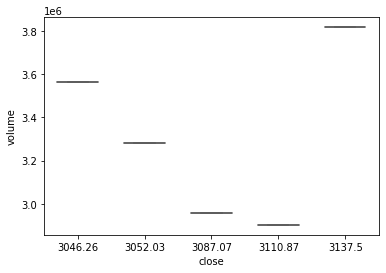

In [5]:
googl = get_tiingo('GOOGL')
amzn = get_tiingo('AMZN')
print(googl)
# Plot the orbital period with horizontal boxes
sns.boxplot(x=recent.close, y=recent.volume, data=recent,
            whis=[0, 100], width=.6, palette="vlag")
plt.show()

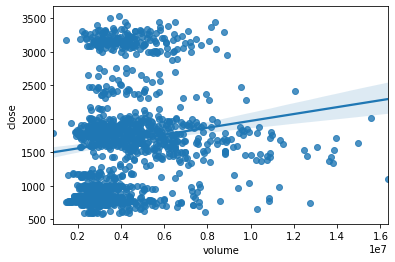

In [6]:
ax = sns.regplot(x=ts.volume, y=ts.close, data=recent)


# Multi Time Series

In [22]:
amzn = get_tiingo('AMZN')
amzn.reset_index(inplace=True)
amzn_Y = amzn.set_index('date').resample('Y').first() # kepe first item in each resample


# Plot each year's time series in its own facet
g = sns.relplot(
    data=amzn_Y,
    x=amzn_Y.volume, y=amzn_Y.close, col=ixcols, hue=ixcols,
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)





AttributeError: 'UTC' object has no attribute 'convert'